In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)   # head() yaptığında tüm columnları yan yana görebilmen için.
import matplotlib.pyplot as plt

# Datanın okutulması ve genel bilgilerine bakılması

In [4]:
df = pd.read_json('scout_car.json', lines=True)  
df.head(3)

url make_model  \
0  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
1  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
2  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   

                                   short_description body_type  price  \
0        Sportback 1.4 TDI S-tronic Xenon Navi Klima    Sedans  15770   
1                                     1.8 TFSI sport    Sedans  14500   
2  Sportback 1.6 TDI S tronic Einparkhilfe plus+m...    Sedans  14640   

                vat         km registration         prev_owner  kW      hp  \
0    VAT deductible  56,013 km      01/2016  2 previous owners NaN   66 kW   
1  Price negotiable  80,000 km      03/2017               None NaN  141 kW   
2    VAT deductible  83,450 km      02/2016   1 previous owner NaN   85 kW   

                                      Type Previous Owners  \
0  [, Used, , Diesel (Particulate Filter)]           \n2\n   
1                     [, Used, , Gasoline]             NaN   
2  [, Used, , Diesel (Particulate Filter)]           \n1\n   

                         Next Inspection         Inspection new  \
0  [\n06/2021\n, \n99 g CO2/km (comb)\n]  [\nYes\n, \nEuro 6\n]   
1                                    NaN                    NaN   
2                                    NaN                    NaN   

                           Warranty Full Service Non-smoking Vehicle null  \
0           [\n, \n, \n4 (Green)\n]     [\n, \n]            [\n, \n]   []   
1                               NaN          NaN                 NaN   []   
2  [\n, \n, \n99 g CO2/km (comb)\n]          NaN                 NaN   []   

       Make         Model     Offer Number First Registration  \
0  \nAudi\n  [\n, A1, \n]  [\nLR-062483\n]     [\n, 2016, \n]   
1  \nAudi\n  [\n, A1, \n]              NaN     [\n, 2017, \n]   
2  \nAudi\n  [\n, A1, \n]   [\nAM-95365\n]     [\n, 2016, \n]   

        Body Color      Paint Type           Body Color Original  \
0  [\n, Black, \n]  [\nMetallic\n]           [\nMythosschwarz\n]   
1    [\n, Red, \n]             NaN                           NaN   
2  [\n, Black, \n]  [\nMetallic\n]  [\nmythosschwarz metallic\n]   

           Upholstery              Body Nr. of Doors Nr. of Seats  \
0  [\nCloth, Black\n]  [\n, Sedans, \n]      [\n5\n]      [\n5\n]   
1   [\nCloth, Grey\n]  [\n, Sedans, \n]      [\n3\n]      [\n4\n]   
2  [\nCloth, Black\n]  [\n, Sedans, \n]      [\n4\n]      [\n4\n]   

       Model Code         Gearing Type    Displacement Cylinders  \
0  [\n0588/BDF\n]  [\n, Automatic, \n]  [\n1,422 cc\n]   [\n3\n]   
1  [\n0588/BCY\n]  [\n, Automatic, \n]  [\n1,798 cc\n]   [\n4\n]   
2             NaN  [\n, Automatic, \n]  [\n1,598 cc\n]       NaN   

           Weight  Drive chain                                   Fuel  \
0  [\n1,220 kg\n]  [\nfront\n]  [\n, Diesel (Particulate Filter), \n]   
1  [\n1,255 kg\n]  [\nfront\n]                     [\n, Gasoline, \n]   
2             NaN  [\nfront\n]  [\n, Diesel (Particulate Filter), \n]   

                                         Consumption  \
0  [[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...   
1  [[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...   
2  [[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...   

                CO2 Emission Emission Class  \
0   [\n99 g CO2/km (comb)\n]   [\nEuro 6\n]   
1  [\n129 g CO2/km (comb)\n]   [\nEuro 6\n]   
2   [\n99 g CO2/km (comb)\n]   [\nEuro 6\n]   

                           \nComfort & Convenience\n  \
0  [Air conditioning, Armrest, Automatic climate ...   
1  [Air conditioning, Automatic climate control, ...   
2  [Air conditioning, Cruise control, Electrical ...   

                           \nEntertainment & Media\n  \
0  [Bluetooth, Hands-free equipment, On-board com...   
1  [Bluetooth, Hands-free equipment, On-board com...   
2                           [MP3, On-board computer]   

                                          \nExtras\n  \
0  [Alloy wheels, Catalytic Converter, Voice Cont.

In [3]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'null', 'Make', 'Model',
       'Offer Number', 'First Registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'description', 'Emission Label', 'Gears', 'Country version',
       'Electricity consumption', 'Last Service Date', 'Other Fuel Types',
       'Availability', 'Last Timing Belt Service Date', 'Available from'],
      dtype='object')

In [4]:
df.info()
# 54 columns 15919 rows dan oluşmakta. Bazı sütunlar(prev_ovner/ Previous Owners gibi) 
#aynı bilgileri içeriyor gibi karşılaştırma yapılıp aynı ise düşülebilir. 
#Bazı sütunlarda da çok fazla null değer var veya tamamı null bunlar düşürülebilir.```

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

# make_model

In [5]:
df.make_model.value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [6]:
df.make_model.isnull().sum()  #Temiz bir sütun. 

0

# short_description (drop)

In [7]:
df.short_description.head() 

0          Sportback 1.4 TDI S-tronic Xenon Navi Klima
1                                       1.8 TFSI sport
2    Sportback 1.6 TDI S tronic Einparkhilfe plus+m...
3                              1.4 TDi Design S tronic
4    Sportback 1.4 TDI S-Tronic S-Line Ext. admired...
Name: short_description, dtype: object

# description(drop)

In [8]:
df.description

0        [\n, Sicherheit:,  , Deaktivierung für Beifahr...
1        [\nLangstreckenfahrzeug daher die hohe Kilomet...
2        [\n, Fahrzeug-Nummer: AM-95365,  , Ehem. UPE 2...
3        [\nAudi A1: , - 1e eigenaar , - Perfecte staat...
4        [\n, Technik & Sicherheit:, Xenon plus, Klimaa...
                               ...                        
15914    [\nVettura visionabile nella sede in Via Roma ...
15915    [\nDach: Panorama-Glas-Schiebedach, Lackierung...
15916    [\n, Getriebe:,  Automatik, Technik:,  Bordcom...
15917    [\nDEK:[2691331], Renault Espace Blue dCi 200C...
15918    [\n, Sicherheit Airbags:,  , Seitenairbag,  , ...
Name: description, Length: 15919, dtype: object

# body_type

In [9]:
df.body_type.value_counts()  # Temiz bir sütun

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [10]:
df.body_type.isnull().sum() 

60

# Body(drop)

In [11]:
df.Body

0        [\n, Sedans, \n]
1        [\n, Sedans, \n]
2        [\n, Sedans, \n]
3        [\n, Sedans, \n]
4        [\n, Sedans, \n]
               ...       
15914       [\n, Van, \n]
15915       [\n, Van, \n]
15916       [\n, Van, \n]
15917       [\n, Van, \n]
15918       [\n, Van, \n]
Name: Body, Length: 15919, dtype: object

In [12]:
df.Body.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Sedans, \n]           7903
[\n, Station wagon, \n]    3553
[\n, Compact, \n]          3153
[\n, Van, \n]               783
[\n, Other, \n]             290
[\n, Transporter, \n]        88
[\n, Off-Road, \n]           56
[\n, Coupe, \n]              25
[\n, Convertible, \n]         8
Name: Body, dtype: int64

In [13]:
df.body_type.value_counts() 

#body ve body_type sütunlarındaki değerler aynı olduğu için body sütununu düşürüyoruz.

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

# price

In [14]:
df.price.head()  #değerler int. Outlier değerleri daha sonra inceleyeceğiz.k8

0    15770
1    14500
2    14640
3    14500
4    16790
Name: price, dtype: int64

In [15]:
df.price.isnull().sum()

0

# vat

In [16]:
df.vat.value_counts()

VAT deductible      10980
Price negotiable      426
Name: vat, dtype: int64

In [17]:
df.vat.isnull().sum()

4513

In [18]:
df.vat.map(lambda x : True if x  else False ).value_counts()

True     11406
False     4513
Name: vat, dtype: int64

In [19]:
df.vat = df.vat.map(lambda x : False if type(x) == float else True )
#Null değerlerin yerine False eğer VAT deductible veya Price negotiable yazıyorsa True atadık.
#Çünkü bunlar arabayının alım cazibesini arttıran şeyler.

# km

In [20]:
df.km.head() 
#virgül, km, boşluk kaldırılmalı ve object olan sütun nan değerleri de olduğu için floata dönüştürülmeli

0    56,013 km
1    80,000 km
2    83,450 km
3    73,000 km
4    16,200 km
Name: km, dtype: object

In [21]:
df.km.str.replace(',','').str.strip(' km').replace('-', np.nan).astype(float)

0        56013.0
1        80000.0
2        83450.0
3        73000.0
4        16200.0
          ...   
15914        NaN
15915     9900.0
15916       15.0
15917       10.0
15918        NaN
Name: km, Length: 15919, dtype: float64

In [22]:
df.km = df.km.str.replace(',','').str.strip(' km').replace('-', np.nan).astype(float)

# km aralarında "," olduğu ve bazı değerlerin "-" olarak girildiğini gördük. km girilmemiş olan "-" satırlara Nan girebiliriz.

In [23]:
df.km.isnull().sum() 

# 0 olan arabaların km'si null olabilir mi? Diğer sütunlar da temizlendiğinde karşılaştırma yapmalıyız.

1024

# registration(drop)
**Arabanın yaşını bulmak için first registration sütununu kullanıcaz**

In [24]:
df.registration.sample(10)

15554    05/2018
5896     11/2016
3231     05/2016
10382    05/2019
8125     02/2019
5940     07/2016
171      04/2017
12662    04/2019
13546    03/2016
3954         -/-
Name: registration, dtype: object

# First Registration(drop)

In [1]:
df[['registration', 'First Registration']].sample(10) 


NameError: name 'df' is not defined

In [26]:
df['First Registration'].map(lambda x: float(x[1]), na_action = 'ignore')

# registration ve First Registration sütunları aynı yıllara işaret ediyor. 
# Bu iki sütundan First Registration u içindeki yıl bilgisini çekerek kullanacağız.

# First Registration sütunundaki ikinci indeksleri (Nan olanlar indekslenemeyeceği için na_action = ignore yaparak) çektik

0        2016.0
1        2017.0
2        2016.0
3        2016.0
4        2016.0
          ...  
15914       NaN
15915    2019.0
15916    2019.0
15917    2019.0
15918    2019.0
Name: First Registration, Length: 15919, dtype: float64

In [27]:
df['First Registration'] = df['First Registration'].map(lambda x: float(x[1]), na_action = 'ignore')

# age

In [28]:
df['age'] = 2019 - df['First Registration']

In [29]:
df.age.value_counts(dropna = False)

1.0    4522
3.0    3674
2.0    3273
0.0    2853
NaN    1597
Name: age, dtype: int64

# prev_owner

In [30]:
df.prev_owner 

# previous owners kısımlarını atıp sayıları tutmak istiyoruz. 
# İçinde NAn değerler de olduğu için integer değil float'a çevireceğiz.

0        2 previous owners
1                     None
2         1 previous owner
3         1 previous owner
4         1 previous owner
               ...        
15914                 None
15915     1 previous owner
15916     1 previous owner
15917                 None
15918     1 previous owner
Name: prev_owner, Length: 15919, dtype: object

In [31]:
df.prev_owner.str.strip('previous owners').astype(float)

0        2.0
1        NaN
2        1.0
3        1.0
4        1.0
        ... 
15914    NaN
15915    1.0
15916    1.0
15917    NaN
15918    1.0
Name: prev_owner, Length: 15919, dtype: float64

In [32]:
df.prev_owner = df.prev_owner.str.strip('previous owners').astype(float)

In [33]:
df.prev_owner.value_counts()

1.0    8294
2.0     778
3.0      17
4.0       2
Name: prev_owner, dtype: int64

In [34]:
df.p rev_owner.isnull().sum()# null değerler daha önce kullanıcısı olmayan yani yeni arabalar olabilir mi?
#İncelenip eğer öyleyse null değerler yerine 0 atanabilir.

6828

In [35]:
#(df.vehicle_condition == 'New') & (df['prev_owner'].isnull()) 
#True olan satırlarda prev_owner sütunundaki satıra 0 koyucaz

# Previous Owners(drop)

In [36]:
df['Previous Owners'].str.strip('\n').astype(float)

0        2.0
1        NaN
2        1.0
3        1.0
4        1.0
        ... 
15914    NaN
15915    NaN
15916    NaN
15917    NaN
15918    1.0
Name: Previous Owners, Length: 15919, dtype: float64

In [37]:
df['Previous Owners'] = df['Previous Owners'].str.strip('\n').astype(float)

In [38]:
df['Previous Owners'].value_counts()

1.0    8101
2.0     766
0.0     163
3.0      17
4.0       2
Name: Previous Owners, dtype: int64

In [39]:
df.prev_owner.value_counts()


1.0    8294
2.0     778
3.0      17
4.0       2
Name: prev_owner, dtype: int64

In [40]:
df.prev_owner.isnull().sum()

6828

In [41]:
df[['Previous Owners', 'prev_owner']].sample(10)

Previous Owners  prev_owner
12947              NaN         NaN
2126               NaN         NaN
810                NaN         NaN
14327              1.0         1.0
11141              2.0         2.0
1263               NaN         NaN
9632               1.0         1.0
12244              1.0         1.0
2123               NaN         NaN
12625              1.0         1.0

# kW(drop)

In [42]:
df.kW.isnull().sum() # Tüm satırlar null. Drop edilecek

15919

# hp

In [43]:
df.hp.isnull().sum()

0

In [44]:
df.hp 

0         66 kW
1        141 kW
2         85 kW
3         66 kW
4         66 kW
          ...  
15914    147 kW
15915    165 kW
15916    146 kW
15917    147 kW
15918    165 kW
Name: hp, Length: 15919, dtype: object

In [45]:
df.hp.value_counts().index 
# '- kW' değeri var kW atılıp - nana çevrilmeli ki geriye sadece rakamlar kalsın ve bunlarla çalışabilelim.

Index(['85 kW', '66 kW', '81 kW', '100 kW', '110 kW', '70 kW', '125 kW',
       '51 kW', '55 kW', '118 kW', '92 kW', '121 kW', '147 kW', '77 kW',
       '56 kW', '54 kW', '103 kW', '87 kW', '165 kW', '88 kW', '60 kW',
       '162 kW', '- kW', '74 kW', '96 kW', '71 kW', '101 kW', '67 kW',
       '154 kW', '122 kW', '119 kW', '164 kW', '135 kW', '82 kW', '52 kW',
       '1 kW', '78 kW', '146 kW', '294 kW', '141 kW', '57 kW', '120 kW',
       '104 kW', '112 kW', '191 kW', '155 kW', '117 kW', '184 kW', '65 kW',
       '90 kW', '76 kW', '149 kW', '93 kW', '80 kW', '168 kW', '98 kW',
       '150 kW', '40 kW', '53 kW', '167 kW', '89 kW', '140 kW', '127 kW',
       '63 kW', '228 kW', '270 kW', '86 kW', '143 kW', '84 kW', '132 kW',
       '44 kW', '195 kW', '137 kW', '9 kW', '75 kW', '123 kW', '239 kW',
       '115 kW', '133 kW', '163 kW', '4 kW'],
      dtype='object')

In [46]:
df.hp.str.strip(' kW').replace('-', np.nan).astype(float)

0         66.0
1        141.0
2         85.0
3         66.0
4         66.0
         ...  
15914    147.0
15915    165.0
15916    146.0
15917    147.0
15918    165.0
Name: hp, Length: 15919, dtype: float64

In [47]:
df["hp"] = df.hp.str.strip(' kW').replace('-', np.nan).astype(float)

In [48]:
df.hp.isnull().sum()

88

# Type(drop)
**Bu sütundaki verilerle iki tane sütun oluşturucaz**

In [49]:
df.Type 
# bu sütunda hem arabanın yakıt bilgileri hem de used new olma gibi durumu var. İki sütuna dönüştürebiliriz.

0                  [, Used, , Diesel (Particulate Filter)]
1                                     [, Used, , Gasoline]
2                  [, Used, , Diesel (Particulate Filter)]
3                  [, Used, , Diesel (Particulate Filter)]
4                  [, Used, , Diesel (Particulate Filter)]
                               ...                        
15914               [, New, , Diesel (Particulate Filter)]
15915    [, Used, , Super 95 / Super Plus 98 (Particula...
15916                         [, Pre-registered, , Diesel]
15917                         [, Pre-registered, , Diesel]
15918                        [, Demonstration, , Super 95]
Name: Type, Length: 15919, dtype: object

### vehicle_condition

In [50]:
df.Type.map(lambda x : x[1], na_action = 'ignore')

0                  Used
1                  Used
2                  Used
3                  Used
4                  Used
              ...      
15914               New
15915              Used
15916    Pre-registered
15917    Pre-registered
15918     Demonstration
Name: Type, Length: 15919, dtype: object

In [51]:
df['vehicle_condition'] = df.Type.map(lambda x : x[1], na_action = 'ignore') 

In [52]:
df.vehicle_condition.value_counts()

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
Name: vehicle_condition, dtype: int64

In [53]:
df[(df.vehicle_condition == 'New') & (df['Previous Owners'].isnull())]

url      make_model  \
122    https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
710    https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
741    https://www.autoscout24.com//offers/audi-a1-ad...         Audi A1   
946    https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
960    https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
...                                                  ...             ...   
15892  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15902  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15907  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15912  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15914  https://www.autoscout24.com//offers/renault-es...  Renault Espace   

                                       short_description body_type  price  \
122    Sportback basis 30 TFSI 116 S tronic Euro6d-Te...   Compact  18730   
710                                            Sportback   Compact  31990   
741                                             Advanced    Sedans  28290   
946                           Sportback 35 TFSI S tronic   Compact  21406   
960    Sportback basis 35 TFSI 150 S tronic Euro6d-Te...   Compact  20980   
...                                                  ...       ...    ...   
15892                          Intens Energy dCi 160 EDC       Van  41800   
15902                    BLUE dCi 200 EDC Initiale Paris    Sedans  41043   
15907  1.8 TCE 225 INITIALE PARIS, WINTER-, CRUISING-...       Van  39990   
15912              Blue dCi 200CV EDC Executive 4Control       Van  39950   
15914              Blue dCi 200CV EDC Executive 4Control       Van  39950   

        vat    km registration  prev_owner  kW     hp  \
122    True   1.0          -/-         NaN NaN   85.0   
710    True  10.0          -/-         NaN NaN   85.0   
741    True   5.0          -/-         NaN NaN   85.0   
946    True   NaN          -/-         NaN NaN  110.0   
960    True   1.0          -/-         NaN NaN  110.0   
...     ...   ...          ...         ...  ..    ...   
15892  True   2.0          -/-         NaN NaN  118.0   
15902  True   NaN          -/-         NaN NaN  147.0   
15907  True  50.0          -/-         NaN NaN  165.0   
15912  True   NaN          -/-         NaN NaN  147.0   
15914  True   NaN          -/-         NaN NaN  147.0   

                                                    Type  Previous Owners  \
122             [, New, , Super 95 (Particulate Filter)]              NaN   
710                                  [, New, , Gasoline]              NaN   
741                                  [, New, , Gasoline]              NaN   
946                                  [, New, , Gasoline]              NaN   
960             [, New, , Super 95 (Particulate Filter)]              NaN   
...                                                  ...              ...   
15892             [, New, , Diesel (Particulate Filter)]              NaN   
15902             [, New, , Diesel (Particulate Filter)]              NaN   
15907  [, New, , Super 95 / Super Plus 98 / Super E10...              NaN   
15912             [, New, , Diesel (Particulate Filter)]              NaN   
15914             [, New, , Diesel (Particulate Filter)]              NaN   

      Next Inspection Inspection new  \
122               NaN            NaN   
710               NaN            NaN   
741               NaN            NaN   
946               NaN            NaN   
960               NaN            NaN   
...               ...            ...   
15892             NaN            NaN   
15902             NaN            NaN   
15907             NaN            NaN   
15912             NaN            NaN   
15914             NaN            NaN   

                                                Warranty Full Service  \
122                    [\n, \n, \n108 g CO2/km (com

In [54]:
df[(df.vehicle_condition == 'New') & (df['prev_owner'].isnull())] 
# prev_owner sütunum vehicle condition sütunuyla daha çok örtüşüyor.

url      make_model  \
122    https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
710    https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
734    https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
741    https://www.autoscout24.com//offers/audi-a1-ad...         Audi A1   
743    https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
...                                                  ...             ...   
15892  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15902  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15907  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15912  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15914  https://www.autoscout24.com//offers/renault-es...  Renault Espace   

                                       short_description body_type  price  \
122    Sportback basis 30 TFSI 116 S tronic Euro6d-Te...   Compact  18730   
710                                            Sportback   Compact  31990   
734                  SPB 30 TFSI S tronic S line edition    Sedans  30000   
741                                             Advanced    Sedans  28290   
743                         SPB 30 TFSI S tronic Admired    Sedans  25900   
...                                                  ...       ...    ...   
15892                          Intens Energy dCi 160 EDC       Van  41800   
15902                    BLUE dCi 200 EDC Initiale Paris    Sedans  41043   
15907  1.8 TCE 225 INITIALE PARIS, WINTER-, CRUISING-...       Van  39990   
15912              Blue dCi 200CV EDC Executive 4Control       Van  39950   
15914              Blue dCi 200CV EDC Executive 4Control       Van  39950   

        vat    km registration  prev_owner  kW     hp  \
122    True   1.0          -/-         NaN NaN   85.0   
710    True  10.0          -/-         NaN NaN   85.0   
734    True   0.0          -/-         NaN NaN   85.0   
741    True   5.0          -/-         NaN NaN   85.0   
743    True   NaN          -/-         NaN NaN   85.0   
...     ...   ...          ...         ...  ..    ...   
15892  True   2.0          -/-         NaN NaN  118.0   
15902  True   NaN          -/-         NaN NaN  147.0   
15907  True  50.0          -/-         NaN NaN  165.0   
15912  True   NaN          -/-         NaN NaN  147.0   
15914  True   NaN          -/-         NaN NaN  147.0   

                                                    Type  Previous Owners  \
122             [, New, , Super 95 (Particulate Filter)]              NaN   
710                                  [, New, , Gasoline]              NaN   
734                                  [, New, , Gasoline]              0.0   
741                                  [, New, , Gasoline]              NaN   
743                                  [, New, , Gasoline]              0.0   
...                                                  ...              ...   
15892             [, New, , Diesel (Particulate Filter)]              NaN   
15902             [, New, , Diesel (Particulate Filter)]              NaN   
15907  [, New, , Super 95 / Super Plus 98 / Super E10...              NaN   
15912             [, New, , Diesel (Particulate Filter)]              NaN   
15914             [, New, , Diesel (Particulate Filter)]              NaN   

      Next Inspection Inspection new  \
122               NaN            NaN   
710               NaN            NaN   
734               NaN            NaN   
741               NaN            NaN   
743               NaN            NaN   
...               ...            ...   
15892             NaN            NaN   
15902             NaN            NaN   
15907             NaN            NaN   
15912             NaN            NaN   
15914             NaN            NaN   

                                                Warranty Full Service  \
122                    [\n, \n, \n108 g CO2/km (com

### fuel_type

In [55]:
df.Type.map(lambda x : x[3], na_action = 'ignore')

0                          Diesel (Particulate Filter)
1                                             Gasoline
2                          Diesel (Particulate Filter)
3                          Diesel (Particulate Filter)
4                          Diesel (Particulate Filter)
                             ...                      
15914                      Diesel (Particulate Filter)
15915    Super 95 / Super Plus 98 (Particulate Filter)
15916                                           Diesel
15917                                           Diesel
15918                                         Super 95
Name: Type, Length: 15919, dtype: object

In [56]:
df['fuel_type'] = df.Type.map(lambda x : x[3], na_action = 'ignore')

In [57]:
df['fuel_type'].value_counts()

Diesel (Particulate Filter)                                                                                  4315
Super 95                                                                                                     3338
Gasoline                                                                                                     3175
Diesel                                                                                                       2982
Super 95 / Regular/Benzine 91                                                                                 424
                                                                                                             ... 
Domestic gas H                                                                                                  1
Super Plus E10 98                                                                                               1
Super E10 95 / Regular/Benzine 91 / Super 95 / Super Plus 98 / Regular/Benzine E10 91 / 

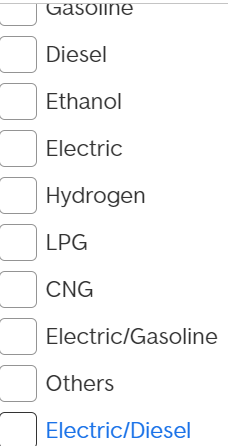
Tüm yakıt türlerini sitedeki bu yakıt türlerine indirgemeye çalıştık.

In [58]:
df['fuel_type'] = df['fuel_type'].str.replace('Super 95', 'Gasoline')\
.str.replace('Super Plus 98', 'Gasoline')\
.str.replace('Regular/Benzine 91', 'Gasoline')\
.str.replace('(Particulate Filter)','')\
.str.replace('Super E10 95','Gasoline')\
.str.replace('/','')\
.str.replace('RegularBenzine E10 91','Gasoline')\
.str.replace('Super Plus E10 98','Gasoline')\
.str.replace('Liquid petroleum gas', 'LPG')\
.str.replace('Domestic gas H', 'LPG')\
.str.replace('(','')\
.str.strip('() ')

In [59]:
df.fuel_type.value_counts() # çift olan değerleri teke indirmek için set yapılabilir

Gasoline                                                      7669
Diesel                                                        7297
Gasoline  Gasoline                                             735
Gasoline  Gasoline  Gasoline  Gasoline                          78
Gasoline  Gasoline  Gasoline  Gasoline  Gasoline  Gasoline      38
CNG                                                             36
Gasoline  Gasoline  Gasoline                                    23
LPG                                                             17
LPG LPG                                                         10
Others                                                           6
ElectricGasoline                                                 4
Gasoline  Gasoline  Gasoline  Gasoline  Gasoline                 1
Biogas                                                           1
Gasoline  Biodiesel                                              1
Electric                                                      

In [60]:
df.fuel_type.map(lambda x :list(set(x.split()))[0], na_action = 'ignore')

0          Diesel
1        Gasoline
2          Diesel
3          Diesel
4          Diesel
           ...   
15914      Diesel
15915    Gasoline
15916      Diesel
15917      Diesel
15918    Gasoline
Name: fuel_type, Length: 15919, dtype: object

In [61]:
df.fuel_type = df.fuel_type.map(lambda x :list(set(x.split()))[0], na_action = 'ignore')

In [62]:
df.fuel_type.value_counts() 

Gasoline            8545
Diesel              7297
CNG                   36
LPG                   27
Others                 6
ElectricGasoline       4
Biogas                 1
Electric               1
Name: fuel_type, dtype: int64

In [63]:
df.fuel_type.isnull().sum()

2

# Fuel(drop)

In [64]:
df.Fuel

0                    [\n, Diesel (Particulate Filter), \n]
1                                       [\n, Gasoline, \n]
2                    [\n, Diesel (Particulate Filter), \n]
3                    [\n, Diesel (Particulate Filter), \n]
4                    [\n, Diesel (Particulate Filter), \n]
                               ...                        
15914                [\n, Diesel (Particulate Filter), \n]
15915    [\n, Super 95 / Super Plus 98 (Particulate Fil...
15916                                     [\n, Diesel, \n]
15917                                     [\n, Diesel, \n]
15918                                   [\n, Super 95, \n]
Name: Fuel, Length: 15919, dtype: object

In [65]:
#yeni oluşturduğum fuel_type ile aynı bilgiyi içerdiği için ve 
#fuel_type null değer sadece 2 tane olduğu için bu sütunu drop edicez.

# Other Fuel Types(drop)

In [66]:
df['Other Fuel Types']

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
15914             NaN
15915    [[], [], []]
15916             NaN
15917             NaN
15918             NaN
Name: Other Fuel Types, Length: 15919, dtype: object

In [67]:
df['Other Fuel Types'].value_counts() #sütunda hiç veri olmadığı için düşülmeli.

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[[], [], []]    880
Name: Other Fuel Types, dtype: int64

# Next Inspection(drop)

In [68]:
df['Next Inspection'] #listenin 0. indexindeki tarihleri almak gerekiyor.

0         [\n06/2021\n, \n99 g CO2/km (comb)\n]
1                                           NaN
2                                           NaN
3                                           NaN
4                                           NaN
                          ...                  
15914                                       NaN
15915    [\n01/2022\n, \n168 g CO2/km (comb)\n]
15916                                       NaN
15917                                       NaN
15918                                       NaN
Name: Next Inspection, Length: 15919, dtype: object

In [69]:
df['Next Inspection'].map(lambda x : x[0].strip('\n '), na_action = 'ignore') 
#0. indexteki değerleri alıp sağınki ve solundaki \n'lardan kurtulduk.

0        06/2021
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
15914        NaN
15915    01/2022
15916        NaN
15917        NaN
15918        NaN
Name: Next Inspection, Length: 15919, dtype: object

In [70]:
df['Next Inspection'] = df['Next Inspection'].map(lambda x : x[0].strip('\n '), na_action = 'ignore')

In [71]:
pd.to_datetime(df['Next Inspection']) 
#object idi datetime a çevrildi.

0       2021-06-01
1              NaT
2              NaT
3              NaT
4              NaT
           ...    
15914          NaT
15915   2022-01-01
15916          NaT
15917          NaT
15918          NaT
Name: Next Inspection, Length: 15919, dtype: datetime64[ns]

In [72]:
df['Next Inspection']= pd.to_datetime(df['Next Inspection'])

In [73]:
df['Next Inspection'].isnull().sum()

13094

# Inspection new

In [74]:
df['Inspection new'] #0. indexteki Yes değerlerini alıcaz

0                     [\nYes\n, \nEuro 6\n]
1                                       NaN
2                                       NaN
3                                       NaN
4        [\nYes\n, \n109 g CO2/km (comb)\n]
                        ...                
15914                                   NaN
15915                                   NaN
15916           [\nYes\n, \nEuro 6d-TEMP\n]
15917                                   NaN
15918    [\nYes\n, \n153 g CO2/km (comb)\n]
Name: Inspection new, Length: 15919, dtype: object

In [75]:
df['Inspection new'].map(lambda x : x[0].strip('\n '), na_action = 'ignore') #Yes değerlerini aldık.

0        Yes
1        NaN
2        NaN
3        NaN
4        Yes
        ... 
15914    NaN
15915    NaN
15916    Yes
15917    NaN
15918    Yes
Name: Inspection new, Length: 15919, dtype: object

In [76]:
df['Inspection new'] = df['Inspection new'].map(lambda x : x[0].strip('\n '), na_action = 'ignore')

In [77]:
df['Inspection new'].map(lambda x :False if type(x) == float  else True) 
#Yes olanlara True Nan değerlere False atadık

0         True
1        False
2        False
3        False
4         True
         ...  
15914    False
15915    False
15916     True
15917    False
15918     True
Name: Inspection new, Length: 15919, dtype: bool

In [78]:
df['Inspection new'] = df['Inspection new'].map(lambda x :False if type(x) == float  else True) 

In [79]:
df[(df['Inspection new'] == True) & (df['Next Inspection'].isnull())].shape
#Inspection new sütunundaki örtüşen 3118 tane değeri yakın tarih ile doldursak bile geriye 10000 tane null değer kalıyor.
#df['Inspection new'] sütunu da tarihini vermese de inspectionun new olup olmadığını verdiği için Next Inspection stununu düşürürüz.

(3118, 57)

# Warranty

In [80]:
df.Warranty.sample(5) #0.indexteki garanti sürelerini çekicem

10786                                         NaN
1927     [\n24 months\n, \n108 g CO2/km (comb)\n]
1084                         [\n, \n, \nEuro 6\n]
1556                         [\n, \n, \nEuro 6\n]
1754                         [\n, \n, \nEuro 6\n]
Name: Warranty, dtype: object

In [81]:
df.Warranty.map(lambda x : x[0].strip('\nmonths '), na_action = 'ignore')


0           
1        NaN
2           
3        NaN
4           
        ... 
15914       
15915       
15916       
15917       
15918    NaN
Name: Warranty, Length: 15919, dtype: object

In [82]:
df.Warranty = df.Warranty.map(lambda x : x[0].strip('\nmonths '), na_action = 'ignore')


In [83]:
df.Warranty.replace('', np.nan).astype(float).sample(10)

1058      NaN
2498      NaN
6038     12.0
1626      NaN
2222      NaN
9707      NaN
10590     NaN
9174      NaN
2564      NaN
12690     NaN
Name: Warranty, dtype: float64

In [84]:
df.Warranty.replace('', np.nan).astype(float).replace(np.nan, 0)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
15914    0.0
15915    0.0
15916    0.0
15917    0.0
15918    0.0
Name: Warranty, Length: 15919, dtype: float64

In [85]:
df.Warranty = df.Warranty.replace('', np.nan).astype(float).replace(np.nan, 0)
#null değerleri 0 ile doldurdum. 

In [86]:
df.Warranty.isnull().sum() 

0

# Full Service(drop)

In [88]:
df['Full Service'].sample(10)
#Bu sütun diğer bazı sütunların karışık değerler içeriyor. Anlamlı bir sütun oluştumak zor. Drop edilmeli

1824                      NaN
11928                     NaN
9998                 [\n, \n]
4678                      NaN
514                  [\n, \n]
3692     [\n, \n, \nEuro 6\n]
6996                      NaN
5516     [\n, \n, \nEuro 6\n]
46                        NaN
13248                     NaN
Name: Full Service, dtype: object

In [6]:
df['Emission Class'].map(lambda x : x[-1].strip('\n'), na_action = 'ignore')

0                          
1                       NaN
2                       NaN
3        99 g CO2/km (comb)
4                 4 (Green)
                ...        
15914                   NaN
15915                   NaN
15916                      
15917                   NaN
15918                   NaN
Name: Full Service, Length: 15919, dtype: object

In [ ]:
df[sütun].str.contains('Euro')

# Non-smoking Vehicle(drop)

In [89]:
df['Non-smoking Vehicle'].sample(10)
#Anlamlı bir sütun çıkarması zor olan bir sütun. Düşürülmeli

11779                                 NaN
4128                             [\n, \n]
6671                 [\n, \n, \nEuro 6\n]
11428                                 NaN
13993                                 NaN
14895                                 NaN
9132                             [\n, \n]
13904                                 NaN
3736                                  NaN
3968     [\n, \n, \n99 g CO2/km (comb)\n]
Name: Non-smoking Vehicle, dtype: object

# null(drop)

In [90]:
df.null.value_counts() #Tüm değerleri boş liste. Düşürülmeli

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]    15919
Name: null, dtype: int64

# Make(drop)

In [91]:
df.Make #make_model stününda bu veri olduğu için drop ediyoruz.

0           \nAudi\n
1           \nAudi\n
2           \nAudi\n
3           \nAudi\n
4           \nAudi\n
            ...     
15914    \nRenault\n
15915    \nRenault\n
15916    \nRenault\n
15917    \nRenault\n
15918    \nRenault\n
Name: Make, Length: 15919, dtype: object

In [92]:
df.make_model.value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [93]:
df.Make.value_counts() # make_model ve Make sütunları karşılaştırıldığında değerler aynı, örtüşüyor.

\nOpel\n       7343
\nAudi\n       5712
\nRenault\n    2864
Name: Make, dtype: int64

# Model(drop)

In [94]:
df.Model

0            [\n, A1, \n]
1            [\n, A1, \n]
2            [\n, A1, \n]
3            [\n, A1, \n]
4            [\n, A1, \n]
               ...       
15914    [\n, Espace, \n]
15915    [\n, Espace, \n]
15916    [\n, Espace, \n]
15917    [\n, Espace, \n]
15918    [\n, Espace, \n]
Name: Model, Length: 15919, dtype: object

In [95]:
df.make_model.value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [96]:
df.Model.value_counts() 
#Model ve make_model sütunlarındaki değerler aynı. O sebeple model sütununu düşüreceğiz.

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, A3, \n]          3097
[\n, A1, \n]          2614
[\n, Insignia, \n]    2598
[\n, Astra, \n]       2526
[\n, Corsa, \n]       2219
[\n, Clio, \n]        1839
[\n, Espace, \n]       991
[\n, Duster, \n]        34
[\n, A2, \n]             1
Name: Model, dtype: int64

# Offer Number(drop)

In [97]:
df['Offer Number']
#ilan numarası olduğu için bu sütunu düşürüyoruz.

0             [\nLR-062483\n]
1                         NaN
2              [\nAM-95365\n]
3                         NaN
4                 [\nC1626\n]
                 ...         
15914          [\n10988301\n]
15915       [\n507370_3223\n]
15916          [\nEspace16\n]
15917           [\n2691331\n]
15918    [\nRe_30000008029\n]
Name: Offer Number, Length: 15919, dtype: object

# Body Color

In [98]:
df['Body Color'] #listelerin 1.indextteki değerlerini çekicem.

0        [\n, Black, \n]
1          [\n, Red, \n]
2        [\n, Black, \n]
3        [\n, Brown, \n]
4        [\n, Black, \n]
              ...       
15914     [\n, Grey, \n]
15915     [\n, Grey, \n]
15916    [\n, White, \n]
15917     [\n, Grey, \n]
15918     [\n, Grey, \n]
Name: Body Color, Length: 15919, dtype: object

In [99]:
df['Body Color'].map(lambda x : x[1], na_action = 'ignore')

0        Black
1          Red
2        Black
3        Brown
4        Black
         ...  
15914     Grey
15915     Grey
15916    White
15917     Grey
15918     Grey
Name: Body Color, Length: 15919, dtype: object

In [100]:
df['Body Color'] = df['Body Color'].map(lambda x : x[1], na_action = 'ignore')

In [101]:
df['Body Color'].isnull().sum()

597

# Paint Type(drop)
*Çünkü is_metalik sütunu olşturduk bu sütundan*

In [102]:
df['Paint Type'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nMetallic\n]       9794
[\nUni/basic\n]       347
[\nPerl effect\n]       6
Name: Paint Type, dtype: int64

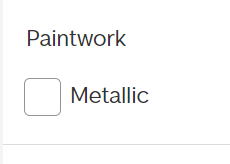 
Arabaları metalik veya değil diye gruplandıracağız

In [103]:
df['Paint Type'].map(lambda x : x[0].strip('\n '), na_action = 'ignore')  #listenin içindeki stringleri çektim
#Uni/basic ve perl effect in sayılarının az olmasından dolayı sütunu metalik olanlara True 
#metalik olmayanlara False olacak şeilde oluşturmaya karar verdik

0        Metallic
1             NaN
2        Metallic
3        Metallic
4        Metallic
           ...   
15914    Metallic
15915    Metallic
15916         NaN
15917         NaN
15918    Metallic
Name: Paint Type, Length: 15919, dtype: object

In [104]:
df['Paint Type'] = df['Paint Type'].map(lambda x : x[0].strip('\n '), na_action = 'ignore')

In [105]:
df['Paint Type'].map(lambda x :  True if x == 'Metallic' else False)

0         True
1        False
2         True
3         True
4         True
         ...  
15914     True
15915     True
15916    False
15917    False
15918     True
Name: Paint Type, Length: 15919, dtype: bool

In [106]:
df['is_metalic'] = df['Paint Type'].map(lambda x :  True if x == 'Metallic' else False)

In [107]:
df.is_metalic.value_counts()

True     9794
False    6125
Name: is_metalic, dtype: int64

# Body Color Original(drop)

In [108]:
df['Body Color Original']
#body_color ve paint type sütunlarının karışık hali olduğu için aynı zamanda almanca olduğu için bu sütunu düşüyoruz

0                 [\nMythosschwarz\n]
1                                 NaN
2        [\nmythosschwarz metallic\n]
3                                 NaN
4        [\nMythosschwarz Metallic\n]
                     ...             
15914              [\nGrigio scuro\n]
15915       [\nStahl-Grau Metallic\n]
15916               [\narktis-weiß\n]
15917                    [\nGrigio\n]
15918    [\nTitanium-Grau Metallic\n]
Name: Body Color Original, Length: 15919, dtype: object

# Upholstery(drop)
**Çünkü bu sütundan Upholstery_color ve Upholstery_type olarak iki columns oluşturduk**

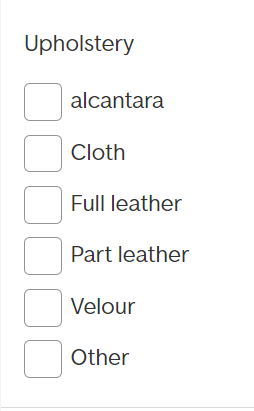

In [109]:
df.Upholstery
#bu sütunda upholstery nin rengi ve tipi var. Yani 2 tane sütun oluşturucaz

0               [\nCloth, Black\n]
1                [\nCloth, Grey\n]
2               [\nCloth, Black\n]
3                              NaN
4               [\nCloth, Black\n]
                   ...            
15914                          NaN
15915                  [\nCloth\n]
15916    [\nFull leather, Black\n]
15917           [\nPart leather\n]
15918    [\nFull leather, Brown\n]
Name: Upholstery, Length: 15919, dtype: object

### Upholsery_type

In [110]:
df['Upholstery'].map(lambda x:x[0].strip('\n').split(',')[0], na_action = 'ignore').value_counts()
#Ilk üç seçenek haricindeki diğer seçeneklerden bazıları renk ile ilgili olduğu bazılarının da (velour ve alcantra) sayıları çok az olduğu için
#ilk üçü alıp diğerlerine de othera ekledik

Cloth           8423
Part leather    1499
Full leather    1009
Black            491
Other            368
Grey             273
Velour            60
alcantara         57
Brown             12
Beige              3
White              2
Blue               2
Name: Upholstery, dtype: int64

In [111]:
df['Upholstery'].map(lambda x:x[0].strip('\n').split(',')[0]\
                                        if x[0].strip('\n').split(',')[0] == "Cloth" or\
                                         x[0].strip('\n').split(',')[0] == "Part leather" or\
                                         x[0].strip('\n').split(',')[0] == "Full leather" else np.nan, na_action = 'ignore')
#cloth,full leather ve part leather olanları aldık diğerlerini nan yaptık. 

0               Cloth
1               Cloth
2               Cloth
3                 NaN
4               Cloth
             ...     
15914             NaN
15915           Cloth
15916    Full leather
15917    Part leather
15918    Full leather
Name: Upholstery, Length: 15919, dtype: object

In [112]:
df['Upholstery_type'] = df['Upholstery'].map(lambda x:x[0].strip('\n').split(',')[0]\
                                        if x[0].strip('\n').split(',')[0] == "Cloth" or\
                                         x[0].strip('\n').split(',')[0] == "Part leather" or\
                                         x[0].strip('\n').split(',')[0] == "Full leather" else np.nan, na_action = 'ignore')

In [113]:
df['Upholstery_type'].replace(np.nan, 'Other') # Tüm nanları othera çevirdim.

0               Cloth
1               Cloth
2               Cloth
3               Other
4               Cloth
             ...     
15914           Other
15915           Cloth
15916    Full leather
15917    Part leather
15918    Full leather
Name: Upholstery_type, Length: 15919, dtype: object

In [114]:
df['Upholstery_type'] = df['Upholstery_type'].replace(np.nan, 'Other')

In [115]:
df['Upholstery_type'].value_counts()

Cloth           8423
Other           4988
Part leather    1499
Full leather    1009
Name: Upholstery_type, dtype: int64

### Upholstery_color

In [116]:
df.Upholstery

0               [\nCloth, Black\n]
1                [\nCloth, Grey\n]
2               [\nCloth, Black\n]
3                              NaN
4               [\nCloth, Black\n]
                   ...            
15914                          NaN
15915                  [\nCloth\n]
15916    [\nFull leather, Black\n]
15917           [\nPart leather\n]
15918    [\nFull leather, Brown\n]
Name: Upholstery, Length: 15919, dtype: object

In [117]:
df.Upholstery.map(lambda x : x[0].split(',')[1].strip('\n ') if len(x[0].split(',')) ==2\
                  else x[0].strip('\n '), na_action = 'ignore')

0               Black
1                Grey
2               Black
3                 NaN
4               Black
             ...     
15914             NaN
15915           Cloth
15916           Black
15917    Part leather
15918           Brown
Name: Upholstery, Length: 15919, dtype: object

In [118]:
df.Upholstery.map(lambda x : x[0].split(',')[1].strip(' \n ') if len(x[0].split(',')) ==2\
                  else x[0].strip(' \n '), na_action = 'ignore').value_counts()

Black           8201
Grey            1376
Other           1016
Cloth           1005
Brown            207
Part leather     140
Full leather     139
Beige             54
Velour            16
Blue              16
White             13
Red                9
Yellow             4
alcantara          2
Orange             1
Name: Upholstery, dtype: int64

In [119]:
df.Upholstery_color = df.Upholstery.map(lambda x : x[0].split(',')[1].strip(' \n ') if len(x[0].split(',')) ==2\
                  else x[0].strip(' \n '), na_action = 'ignore')
#içinde upholstery typlar da var tekrar düzenlemek gerekir.

In [120]:
df.Upholstery_color.value_counts(dropna = False)

Black           8201
NaN             3720
Grey            1376
Other           1016
Cloth           1005
Brown            207
Part leather     140
Full leather     139
Beige             54
Velour            16
Blue              16
White             13
Red                9
Yellow             4
alcantara          2
Orange             1
Name: Upholstery, dtype: int64

In [121]:
df.Upholstery_color.map(lambda x : x if x == 'Black' or x == 'Grey' or x == 'Brown' else 'Other').value_counts()
#Black, Grey, Brown renklerini aldık sadece. Çünkü diğer renklerin sayısı çok az. Nan ve diğer renkleri Othera ekledik.

Black    8201
Other    6135
Grey     1376
Brown     207
Name: Upholstery, dtype: int64

In [122]:
df.Upholstery_color = df.Upholstery_color.map(lambda x : x if x == 'Black' or x == 'Grey' or x == 'Brown' else 'Other')

# Nr. of Doors

In [123]:
df['Nr. of Doors']

0        [\n5\n]
1        [\n3\n]
2        [\n4\n]
3        [\n3\n]
4        [\n5\n]
          ...   
15914    [\n5\n]
15915    [\n5\n]
15916    [\n5\n]
15917    [\n5\n]
15918    [\n5\n]
Name: Nr. of Doors, Length: 15919, dtype: object

In [124]:
df['Nr. of Doors'].map(lambda x : float(x [0].strip('\n')), na_action = 'ignore')
#Listenin içindeki sayıları çektik. Nan değerler olduğu için flata çevirdik.

0        5.0
1        3.0
2        4.0
3        3.0
4        5.0
        ... 
15914    5.0
15915    5.0
15916    5.0
15917    5.0
15918    5.0
Name: Nr. of Doors, Length: 15919, dtype: float64

In [125]:
df['Nr. of Doors'] = df['Nr. of Doors'].map(lambda x : float(x [0].strip('\n')), na_action = 'ignore')

In [126]:
df['Nr. of Doors'].value_counts()

5.0    11575
4.0     3079
3.0      832
2.0      219
7.0        1
1.0        1
Name: Nr. of Doors, dtype: int64

# Nr of Seats

In [127]:
df['Nr. of Seats']

0        [\n5\n]
1        [\n4\n]
2        [\n4\n]
3        [\n4\n]
4        [\n5\n]
          ...   
15914    [\n5\n]
15915    [\n5\n]
15916    [\n7\n]
15917    [\n7\n]
15918    [\n5\n]
Name: Nr. of Seats, Length: 15919, dtype: object

In [128]:
df['Nr. of Seats'].map(lambda x : float(x[0].strip('\n')), na_action = 'ignore')
#Listenin içindeki sayıları çektik

0        5.0
1        4.0
2        4.0
3        4.0
4        5.0
        ... 
15914    5.0
15915    5.0
15916    7.0
15917    7.0
15918    5.0
Name: Nr. of Seats, Length: 15919, dtype: float64

In [129]:
df['Nr. of Seats'] = df['Nr. of Seats'].map(lambda x : float(x[0].strip('\n')), na_action = 'ignore')

In [130]:
df['Nr. of Seats'].value_counts(dropna = False)

5.0    13336
4.0     1125
NaN      977
7.0      362
2.0      116
6.0        2
3.0        1
Name: Nr. of Seats, dtype: int64

# Model Code(drop)

In [131]:
df['Model Code'].value_counts(dropna = False)
#Çok fazla nan değer olduğu için ve aynı zamanda elimizde arabanın model bilgileri olduğu için bu sütunu düşürdük

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN               10941
[\n0035/BCB\n]      268
[\n0588/BNO\n]      245
[\n0588/BDB\n]      206
[\n0588/BHX\n]      188
                  ...  
[\n0035/BHX\n]        1
[\n0588/AVR\n]        1
[\n0035/ASN\n]        1
[\n1844/AEG\n]        1
[\n3333/BBL\n]        1
Name: Model Code, Length: 233, dtype: int64

# Gearing Type

In [132]:
df['Gearing Type']

0        [\n, Automatic, \n]
1        [\n, Automatic, \n]
2        [\n, Automatic, \n]
3        [\n, Automatic, \n]
4        [\n, Automatic, \n]
                ...         
15914    [\n, Automatic, \n]
15915    [\n, Automatic, \n]
15916    [\n, Automatic, \n]
15917    [\n, Automatic, \n]
15918    [\n, Automatic, \n]
Name: Gearing Type, Length: 15919, dtype: object

In [133]:
df['Gearing Type'].map(lambda x: x[1].strip())

0        Automatic
1        Automatic
2        Automatic
3        Automatic
4        Automatic
           ...    
15914    Automatic
15915    Automatic
15916    Automatic
15917    Automatic
15918    Automatic
Name: Gearing Type, Length: 15919, dtype: object

In [134]:
df['Gearing Type'] = df['Gearing Type'].map(lambda x: x[1].strip())

In [135]:
df['Gearing Type'].value_counts(dropna= False)
#Nan değerleri olmayan temiz bir sütun

Manual            8153
Automatic         7297
Semi-automatic     469
Name: Gearing Type, dtype: int64

# Displacement

In [136]:
df.Displacement

0        [\n1,422 cc\n]
1        [\n1,798 cc\n]
2        [\n1,598 cc\n]
3        [\n1,422 cc\n]
4        [\n1,422 cc\n]
              ...      
15914    [\n1,997 cc\n]
15915    [\n1,798 cc\n]
15916    [\n1,997 cc\n]
15917    [\n1,997 cc\n]
15918    [\n1,798 cc\n]
Name: Displacement, Length: 15919, dtype: object

In [137]:
df.Displacement.map(lambda x : x[0].strip(' cc\n ').replace(',',''), na_action = 'ignore').astype(float)

0        1422.0
1        1798.0
2        1598.0
3        1422.0
4        1422.0
          ...  
15914    1997.0
15915    1798.0
15916    1997.0
15917    1997.0
15918    1798.0
Name: Displacement, Length: 15919, dtype: float64

In [138]:
df.Displacement = df.Displacement.map(lambda x : x[0].strip(' cc\n ').replace(',',''), na_action = 'ignore').astype(float)

In [139]:
df.Displacement.isnull().sum()

496

# Cyclinders

In [140]:
df.Cylinders

0        [\n3\n]
1        [\n4\n]
2            NaN
3        [\n3\n]
4        [\n3\n]
          ...   
15914    [\n4\n]
15915    [\n4\n]
15916    [\n4\n]
15917    [\n4\n]
15918    [\n4\n]
Name: Cylinders, Length: 15919, dtype: object

In [141]:
df.Cylinders.map(lambda x: float(x[0].strip('\n')), na_action = 'ignore')

0        3.0
1        4.0
2        NaN
3        3.0
4        3.0
        ... 
15914    4.0
15915    4.0
15916    4.0
15917    4.0
15918    4.0
Name: Cylinders, Length: 15919, dtype: float64

In [142]:
df.Cylinders = df.Cylinders.map(lambda x: float(x[0].strip('\n')), na_action = 'ignore')

In [143]:
df.Cylinders.value_counts(dropna = False)

4.0    8105
NaN    5680
3.0    2104
5.0      22
6.0       3
8.0       2
2.0       2
1.0       1
Name: Cylinders, dtype: int64

# Weight(drop)
**Çünkü Weight_kg diye bir sütun oluşturduk**

In [144]:
df.Weight

0        [\n1,220 kg\n]
1        [\n1,255 kg\n]
2                   NaN
3        [\n1,195 kg\n]
4                   NaN
              ...      
15914    [\n1,758 kg\n]
15915    [\n1,708 kg\n]
15916               NaN
15917    [\n1,758 kg\n]
15918    [\n1,685 kg\n]
Name: Weight, Length: 15919, dtype: object

In [145]:
df.Weight.map(lambda x : float(x[0].strip('\nkg ').replace(',','')), na_action = 'ignore')

0        1220.0
1        1255.0
2           NaN
3        1195.0
4           NaN
          ...  
15914    1758.0
15915    1708.0
15916       NaN
15917    1758.0
15918    1685.0
Name: Weight, Length: 15919, dtype: float64

In [146]:
df.Weight_kg = df.Weight.map(lambda x : float(x[0].strip('\nkg ').replace(',','')), na_action = 'ignore')

# Drive chain

In [147]:
df['Drive chain'].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nfront\n]    8886
NaN            6858
[\n4WD\n]       171
[\nrear\n]        4
Name: Drive chain, dtype: int64

In [148]:
df['Drive chain'].map(lambda x : x[0].strip('\n '), na_action = 'ignore')

0        front
1        front
2        front
3          NaN
4        front
         ...  
15914    front
15915    front
15916    front
15917    front
15918      4WD
Name: Drive chain, Length: 15919, dtype: object

In [149]:
df['Drive chain'] = df['Drive chain'].map(lambda x : x[0].strip('\n '), na_action = 'ignore')

In [150]:
df['Drive chain'].value_counts(dropna= False)

front    8886
NaN      6858
4WD       171
rear        4
Name: Drive chain, dtype: int64

# Consumption(drop)

In [151]:
df.Consumption
# Bu sütundan iki sütun oluşturucaz city ve comb için ayrı ayrı

0        [[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...
1        [[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...
2        [[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...
3        [[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...
4        [[4.1 l/100 km (comb)], [4.6 l/100 km (city)],...
                               ...                        
15914    [[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...
15915    [\n, 7.4 l/100 km (comb), \n, 9.2 l/100 km (ci...
15916    [[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...
15917    [[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...
15918    [[6.8 l/100 km (comb)], [8.7 l/100 km (city)],...
Name: Consumption, Length: 15919, dtype: object

### Consumption(comb)

In [152]:
df.Consumption.map(lambda x : [x[1]] if x[0] =='\n' else x[0], na_action = 'ignore')
# Bazı satırlardaki değerler tek liste bazı satırlardaki değerler iki listenin içerisinde 
#olduğu için bu şekilde önce standartlaştırdım.

0        [3.8 l/100 km (comb)]
1        [5.6 l/100 km (comb)]
2        [3.8 l/100 km (comb)]
3        [3.8 l/100 km (comb)]
4        [4.1 l/100 km (comb)]
                 ...          
15914    [5.3 l/100 km (comb)]
15915    [7.4 l/100 km (comb)]
15916    [5.3 l/100 km (comb)]
15917    [5.3 l/100 km (comb)]
15918    [6.8 l/100 km (comb)]
Name: Consumption, Length: 15919, dtype: object

In [153]:
df['Consumption(comb)'] = df.Consumption.map(lambda x : [x[1]] if x[0] =='\n' else x[0], na_action = 'ignore')

In [154]:
df['Consumption(comb)'].map(lambda x: np.nan if x == [] else x[0], na_action = 'ignore')
#Liste boş iste nan dönmesini değer varsa içindeki değerin dönmesini sağladık.

0        3.8 l/100 km (comb)
1        5.6 l/100 km (comb)
2        3.8 l/100 km (comb)
3        3.8 l/100 km (comb)
4        4.1 l/100 km (comb)
                ...         
15914    5.3 l/100 km (comb)
15915    7.4 l/100 km (comb)
15916    5.3 l/100 km (comb)
15917    5.3 l/100 km (comb)
15918    6.8 l/100 km (comb)
Name: Consumption(comb), Length: 15919, dtype: object

In [155]:
df['Consumption(comb)'] = df['Consumption(comb)'].map(lambda x: np.nan if x == [] else x[0], na_action = 'ignore')

In [156]:
df['Consumption(comb)'].str.replace(' l/100 km ', '')\
                        .str.replace('comb', '').str.replace( 'kg/100 km', '')\
                        .str.strip('() ')
#Sayıların sağ tarafındaki harf ve sayılar temizlendi.

0        3.8
1        5.6
2        3.8
3        3.8
4        4.1
        ... 
15914    5.3
15915    7.4
15916    5.3
15917    5.3
15918    6.8
Name: Consumption(comb), Length: 15919, dtype: object

In [157]:
df['Consumption(comb)'] = df['Consumption(comb)'].str.replace(' l/100 km ', '')\
.str.replace('comb', '').str.replace( 'kg/100 km', '')\
.str.strip('() ')

In [158]:
df['Consumption(comb)'] = df['Consumption(comb)'].astype(float) 
#floata çevrildi.

### Comsumption(city)

In [159]:
df.Consumption.map(lambda x : [x[3]] if x[0] =='\n' else x[1], na_action = 'ignore')

0        [4.3 l/100 km (city)]
1        [7.1 l/100 km (city)]
2        [4.4 l/100 km (city)]
3        [4.3 l/100 km (city)]
4        [4.6 l/100 km (city)]
                 ...          
15914    [6.2 l/100 km (city)]
15915    [9.2 l/100 km (city)]
15916    [6.2 l/100 km (city)]
15917    [6.2 l/100 km (city)]
15918    [8.7 l/100 km (city)]
Name: Consumption, Length: 15919, dtype: object

In [160]:
df['Consumption(city)'] = df.Consumption.map(lambda x : [x[3]] if x[0] =='\n' else x[1], na_action = 'ignore')

In [161]:
df['Consumption(city)'].map(lambda x: np.nan if x == [] else x[0], na_action = 'ignore')

0        4.3 l/100 km (city)
1        7.1 l/100 km (city)
2        4.4 l/100 km (city)
3        4.3 l/100 km (city)
4        4.6 l/100 km (city)
                ...         
15914    6.2 l/100 km (city)
15915    9.2 l/100 km (city)
15916    6.2 l/100 km (city)
15917    6.2 l/100 km (city)
15918    8.7 l/100 km (city)
Name: Consumption(city), Length: 15919, dtype: object

In [162]:
df['Consumption(city)'] = df['Consumption(city)'].map(lambda x: np.nan if x == [] else x[0], na_action = 'ignore')

In [163]:
df['Consumption(city)'].str.replace('l/100 km', '')\
                        .str.replace('city', '').str.strip('\n() ')\
                        .str.replace( ' kg/100 km', '')

0        4.3
1        7.1
2        4.4
3        4.3
4        4.6
        ... 
15914    6.2
15915    9.2
15916    6.2
15917    6.2
15918    8.7
Name: Consumption(city), Length: 15919, dtype: object

In [164]:
df['Consumption(city)'] = df['Consumption(city)'].str.replace('l/100 km', '')\
                        .str.replace('city', '').str.strip('\n() ')\
                        .str.replace( ' kg/100 km', '')

In [165]:
df['Consumption(city)'].unique()
# '' stringini nan a çevirmek lazım.

array(['4.3', '7.1', '4.4', '4.6', '4.2', nan, '6.2', '5', '5.5', '5.4',
       '3.8', '5.2', '3', '4', '3.9', '4.1', '4.7', '6.3', '6.7', '5.6',
       '4.8', '6.6', '4.5', '5.8', '7.4', '6.1', '3.7', '5.1', '19.9',
       '6.4', '8.2', '6', '6.5', '5.9', '8', '62', '6.8', '7.5', '3.5',
       '5.3', '3.4', '6.9', '5.7', '7.3', '4.9', '3.6', '11.3', '9',
       '11.2', '', '45', '43', '8.3', '10.5', '0', '7.2', '8.5', '7.7',
       '9.9', '8.9', '7.8', '8.4', '8.6', '7', '7.9', '8.7', '10.4',
       '7.6', '8.1', '66', '9.8', '1', '11', '16.1', '11.5', '9.5', '9.2',
       '9.6', '9.4', '10.8', '8.8', '10.2', '10.1', '3.3', '64', '10',
       '9.1', '9.7'], dtype=object)

In [166]:
df['Consumption(city)'].map(lambda x : np.nan if x == '' else float(x))

0        4.3
1        7.1
2        4.4
3        4.3
4        4.6
        ... 
15914    6.2
15915    9.2
15916    6.2
15917    6.2
15918    8.7
Name: Consumption(city), Length: 15919, dtype: float64

In [167]:
df['Consumption(city)'] = df['Consumption(city)'].map(lambda x : np.nan if x == '' else float(x))

In [168]:
df['Consumption(city)'].unique()

array([ 4.3,  7.1,  4.4,  4.6,  4.2,  nan,  6.2,  5. ,  5.5,  5.4,  3.8,
        5.2,  3. ,  4. ,  3.9,  4.1,  4.7,  6.3,  6.7,  5.6,  4.8,  6.6,
        4.5,  5.8,  7.4,  6.1,  3.7,  5.1, 19.9,  6.4,  8.2,  6. ,  6.5,
        5.9,  8. , 62. ,  6.8,  7.5,  3.5,  5.3,  3.4,  6.9,  5.7,  7.3,
        4.9,  3.6, 11.3,  9. , 11.2, 45. , 43. ,  8.3, 10.5,  0. ,  7.2,
        8.5,  7.7,  9.9,  8.9,  7.8,  8.4,  8.6,  7. ,  7.9,  8.7, 10.4,
        7.6,  8.1, 66. ,  9.8,  1. , 11. , 16.1, 11.5,  9.5,  9.2,  9.6,
        9.4, 10.8,  8.8, 10.2, 10.1,  3.3, 64. , 10. ,  9.1,  9.7])

# Co2 Emission

In [169]:
df['CO2 Emission']

0         [\n99 g CO2/km (comb)\n]
1        [\n129 g CO2/km (comb)\n]
2         [\n99 g CO2/km (comb)\n]
3         [\n99 g CO2/km (comb)\n]
4        [\n109 g CO2/km (comb)\n]
                   ...            
15914    [\n139 g CO2/km (comb)\n]
15915    [\n168 g CO2/km (comb)\n]
15916    [\n139 g CO2/km (comb)\n]
15917    [\n139 g CO2/km (comb)\n]
15918    [\n153 g CO2/km (comb)\n]
Name: CO2 Emission, Length: 15919, dtype: object

In [1]:
df['CO2 Emission'][0]

NameError: name 'df' is not defined

In [170]:
df['CO2 Emission'].map(lambda x : np.nan if x[0] == [] else float(x[0]\
                                        .replace(' g CO2/km (comb)\n', '')\
                                        .strip(' \n').replace(',', '.')), na_action = 'ignore')

0         99.0
1        129.0
2         99.0
3         99.0
4        109.0
         ...  
15914    139.0
15915    168.0
15916    139.0
15917    139.0
15918    153.0
Name: CO2 Emission, Length: 15919, dtype: float64

In [171]:
df['CO2 Emission'] = df['CO2 Emission'].map(lambda x : np.nan if x[0] == [] else float(x[0]\
                                        .replace(' g CO2/km (comb)\n', '')\
                                        .strip(' \n').replace(',', '.')), na_action = 'ignore')

# Emission Class

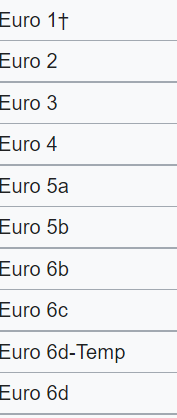
emission class çeşitleri

In [172]:
df['Emission Class']
#buradaki sadece sayıları almak istiyorum

0              [\nEuro 6\n]
1              [\nEuro 6\n]
2              [\nEuro 6\n]
3              [\nEuro 6\n]
4              [\nEuro 6\n]
                ...        
15914                   NaN
15915                   NaN
15916    [\nEuro 6d-TEMP\n]
15917          [\nEuro 6\n]
15918          [\nEuro 6\n]
Name: Emission Class, Length: 15919, dtype: object

In [173]:
df['Emission Class'].map(lambda x :np.nan if x == [] or x[0] == [] else x[0]\
                                                .strip(' \nEuro'), na_action = 'ignore')

0              6
1              6
2              6
3              6
4              6
          ...   
15914        NaN
15915        NaN
15916    6d-TEMP
15917          6
15918          6
Name: Emission Class, Length: 15919, dtype: object

In [174]:
df['Emission Class'] = df['Emission Class'].map(lambda x :np.nan if x == [] or x[0] == [] else x[0]\
                                                .strip(' \nEuro'), na_action = 'ignore')

In [175]:
df['Emission Class'].value_counts(dropna = False)

6          10139
NaN         3628
6d-TEMP     1845
6c           127
5             78
6d            62
4             40
Name: Emission Class, dtype: int64

# Emission Label(drop)

In [176]:
df['Emission Label'].value_counts(dropna = False)
#Bu sütunu düşücez.Elimizde emission class sütunu var zaten

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                     11934
[\n4 (Green)\n]          3553
[\n1 (No sticker)\n]      381
[[], [], []]               40
[\n5 (Blue)\n]              8
[\n3 (Yellow)\n]            2
[\n2 (Red)\n]               1
Name: Emission Label, dtype: int64

# '\nEntertainment & Media\n'(drop)
**Çünkü bu sütunu kullanarak başka sütunlar oluşturduk**

In [177]:
df['\nEntertainment & Media\n']

0        [Bluetooth, Hands-free equipment, On-board com...
1        [Bluetooth, Hands-free equipment, On-board com...
2                                 [MP3, On-board computer]
3        [Bluetooth, CD player, Hands-free equipment, M...
4        [Bluetooth, CD player, Hands-free equipment, M...
                               ...                        
15914    [Bluetooth, Digital radio, Hands-free equipmen...
15915    [Bluetooth, Digital radio, Hands-free equipmen...
15916    [Bluetooth, Hands-free equipment, On-board com...
15917               [Bluetooth, Digital radio, Radio, USB]
15918                                                [USB]
Name: \nEntertainment & Media\n, Length: 15919, dtype: object

In [178]:
entertainment = list({j for i in df['\nEntertainment & Media\n'][df['\nEntertainment & Media\n'].notna()] for j in i})

In [179]:
entertainment #'\nEntertainment & Media\n' sütununda yer alan özlellikler

['Bluetooth',
 'Sound system',
 'Hands-free equipment',
 'On-board computer',
 'USB',
 'Radio',
 'Television',
 'Digital radio',
 'CD player',
 'MP3']

In [180]:
df['\nEntertainment & Media\n'].map(lambda x : ', '.join(x), na_action = 'ignore')

0        Bluetooth, Hands-free equipment, On-board comp...
1        Bluetooth, Hands-free equipment, On-board comp...
2                                   MP3, On-board computer
3        Bluetooth, CD player, Hands-free equipment, MP...
4        Bluetooth, CD player, Hands-free equipment, MP...
                               ...                        
15914    Bluetooth, Digital radio, Hands-free equipment...
15915    Bluetooth, Digital radio, Hands-free equipment...
15916    Bluetooth, Hands-free equipment, On-board comp...
15917                 Bluetooth, Digital radio, Radio, USB
15918                                                  USB
Name: \nEntertainment & Media\n, Length: 15919, dtype: object

In [181]:
df['\nEntertainment & Media\n'] = df['\nEntertainment & Media\n'].map(lambda x : ', '.join(x), na_action = 'ignore')

In [182]:
sözlük = {}
for i in entertainment:
    sözlük[i] = df['\nEntertainment & Media\n'].str.contains(i).sum()
print(sözlük)
#Sayıları az olmadığı için True False olan ayrı sütunlar oluşturucaz.

{'Bluetooth': 11650, 'Sound system': 2240, 'Hands-free equipment': 9305, 'On-board computer': 11938, 'USB': 8158, 'Radio': 11989, 'Television': 35, 'Digital radio': 2229, 'CD player': 4791, 'MP3': 5853}


In [183]:
for i in entertainment:
    df[i] = df['\nEntertainment & Media\n'].str.contains(i)

# '\nComfort & Convenience\n'(drop)
**Çünkü yeni columnslar oluşturduk bu sütunun içindeki verilerle**

In [184]:
df['\nComfort & Convenience\n']

0        [Air conditioning, Armrest, Automatic climate ...
1        [Air conditioning, Automatic climate control, ...
2        [Air conditioning, Cruise control, Electrical ...
3        [Air suspension, Armrest, Auxiliary heating, E...
4        [Air conditioning, Armrest, Automatic climate ...
                               ...                        
15914    [Air conditioning, Automatic climate control, ...
15915    [Air conditioning, Automatic climate control, ...
15916    [Air conditioning, Armrest, Automatic climate ...
15917    [Air conditioning, Automatic climate control, ...
15918    [Air conditioning, Automatic climate control, ...
Name: \nComfort & Convenience\n, Length: 15919, dtype: object

In [185]:
comfort = list({j for i in df['\nComfort & Convenience\n'][df['\nComfort & Convenience\n'].notna()] for j in i})
#sütundaki unique değerleri listede topladım

In [186]:
comfort

['Leather seats',
 'Navigation system',
 'Panorama roof',
 'Keyless central door lock',
 'Heads-up display',
 'Seat ventilation',
 'Wind deflector',
 'Parking assist system sensors rear',
 'Start-stop system',
 'Massage seats',
 'Parking assist system camera',
 'Split rear seats',
 'Tinted windows',
 'Leather steering wheel',
 'Light sensor',
 'Power windows',
 'Parking assist system sensors front',
 'Heated steering wheel',
 'Auxiliary heating',
 'Windshield',
 'Electric tailgate',
 'Automatic climate control',
 'Air suspension',
 'Seat heating',
 'Sunroof',
 'Hill Holder',
 'Cruise control',
 'Air conditioning',
 'Multi-function steering wheel',
 'Lumbar support',
 'Electrically heated windshield',
 'Electrically adjustable seats',
 'Electrical side mirrors',
 'Parking assist system self-steering',
 'Rain sensor',
 'Electric Starter',
 'Armrest',
 'Park Distance Control']

In [187]:
df['\nComfort & Convenience\n'].map(lambda x : ', '.join(x), na_action = 'ignore')
#Listeleri stringe çevirdik.

0        Air conditioning, Armrest, Automatic climate c...
1        Air conditioning, Automatic climate control, H...
2        Air conditioning, Cruise control, Electrical s...
3        Air suspension, Armrest, Auxiliary heating, El...
4        Air conditioning, Armrest, Automatic climate c...
                               ...                        
15914    Air conditioning, Automatic climate control, C...
15915    Air conditioning, Automatic climate control, C...
15916    Air conditioning, Armrest, Automatic climate c...
15917    Air conditioning, Automatic climate control, C...
15918    Air conditioning, Automatic climate control, C...
Name: \nComfort & Convenience\n, Length: 15919, dtype: object

In [188]:
df['\nComfort & Convenience\n'] = df['\nComfort & Convenience\n'].map(lambda x : ', '.join(x), na_action = 'ignore')

In [189]:
dictt = {}
for i in comfort:
     dictt[i] = df['\nComfort & Convenience\n'].str.contains(i).sum()
print(dictt)
#Az sayıda olanlar sütuna dönüştürlmeyebilir. Ama kaçtan az olanlar sınırını koyamıyorum :))

{'Leather seats': 48, 'Navigation system': 8166, 'Panorama roof': 551, 'Keyless central door lock': 2613, 'Heads-up display': 606, 'Seat ventilation': 834, 'Wind deflector': 41, 'Parking assist system sensors rear': 9694, 'Start-stop system': 8881, 'Massage seats': 360, 'Parking assist system camera': 3421, 'Split rear seats': 2387, 'Tinted windows': 1444, 'Leather steering wheel': 9386, 'Light sensor': 7672, 'Power windows': 13914, 'Parking assist system sensors front': 5838, 'Heated steering wheel': 3017, 'Auxiliary heating': 266, 'Windshield': 12, 'Electric tailgate': 1003, 'Automatic climate control': 8747, 'Air suspension': 62, 'Seat heating': 7078, 'Sunroof': 372, 'Hill Holder': 6745, 'Cruise control': 10881, 'Air conditioning': 14315, 'Multi-function steering wheel': 11083, 'Lumbar support': 3226, 'Electrically heated windshield': 937, 'Electrically adjustable seats': 1866, 'Electrical side mirrors': 11881, 'Parking assist system self-steering': 768, 'Rain sensor': 8615, 'Electr

In [190]:
for i in comfort:
     df[i] = df['\nComfort & Convenience\n'].str.contains(i)

# \nExtras\n(drop)
**Çünkü yeni columnslar oluşturuldu bu sütunun içindeki verilerle**

In [191]:
df['\nExtras\n']

0        [Alloy wheels, Catalytic Converter, Voice Cont...
1        [Alloy wheels, Sport seats, Sport suspension, ...
2                            [Alloy wheels, Voice Control]
3               [Alloy wheels, Sport seats, Voice Control]
4        [Alloy wheels, Sport package, Sport suspension...
                               ...                        
15914                         [Alloy wheels, Touch screen]
15915          [Alloy wheels, Touch screen, Voice Control]
15916                                       [Alloy wheels]
15917                         [Alloy wheels, Touch screen]
15918                         [Alloy wheels, Touch screen]
Name: \nExtras\n, Length: 15919, dtype: object

In [192]:
extras = list({j for i in df['\nExtras\n'][df['\nExtras\n'].notna()] for j in i})

In [193]:
extras

['Sport seats',
 'Handicapped enabled',
 'Cab or rented Car',
 'Alloy wheels',
 'Catalytic Converter',
 'Sport package',
 'Roof rack',
 'Voice Control',
 'Sliding door',
 'Tuned car',
 'Winter tyres',
 'Right hand drive',
 'Touch screen',
 'Ski bag',
 'Shift paddles',
 'Trailer hitch',
 'Sport suspension']

In [194]:
df['\nExtras\n'].map(lambda x : ', '.join(x), na_action = 'ignore')
#Listeleri içindeki değerleri alıp birleştirdim.

0         Alloy wheels, Catalytic Converter, Voice Control
1        Alloy wheels, Sport seats, Sport suspension, V...
2                              Alloy wheels, Voice Control
3                 Alloy wheels, Sport seats, Voice Control
4        Alloy wheels, Sport package, Sport suspension,...
                               ...                        
15914                           Alloy wheels, Touch screen
15915            Alloy wheels, Touch screen, Voice Control
15916                                         Alloy wheels
15917                           Alloy wheels, Touch screen
15918                           Alloy wheels, Touch screen
Name: \nExtras\n, Length: 15919, dtype: object

In [195]:
df['\nExtras\n'] = df['\nExtras\n'].map(lambda x : ', '.join(x), na_action = 'ignore')

In [196]:
extra_s = {}
for i in extras:
    extra_s[i] = df['\nExtras\n'].str.contains(i).sum()
print(extra_s)

{'Sport seats': 3098, 'Handicapped enabled': 52, 'Cab or rented Car': 310, 'Alloy wheels': 11294, 'Catalytic Converter': 2258, 'Sport package': 1198, 'Roof rack': 2647, 'Voice Control': 4326, 'Sliding door': 3, 'Tuned car': 13, 'Winter tyres': 246, 'Right hand drive': 3, 'Touch screen': 4043, 'Ski bag': 247, 'Shift paddles': 508, 'Trailer hitch': 654, 'Sport suspension': 1619}


In [197]:
for i in extras:
    df[i] = df['\nExtras\n'].str.contains(i)

# \nSafety & Security\n(drop)
**Çünkü bu sütunun içindeki verilerle başka sütunlar oluşturduk**

In [198]:
safety = {j for i in df['\nSafety & Security\n'][df['\nSafety & Security\n'].notna()] for j in i}

In [199]:
safety

{'ABS',
 'Adaptive Cruise Control',
 'Adaptive headlights',
 'Alarm system',
 'Blind spot monitor',
 'Central door lock',
 'Central door lock with remote control',
 'Daytime running lights',
 'Driver drowsiness detection',
 'Driver-side airbag',
 'Electronic stability control',
 'Emergency brake assistant',
 'Emergency system',
 'Fog lights',
 'Head airbag',
 'Immobilizer',
 'Isofix',
 'LED Daytime Running Lights',
 'LED Headlights',
 'Lane departure warning system',
 'Night view assist',
 'Passenger-side airbag',
 'Power steering',
 'Rear airbag',
 'Side airbag',
 'Tire pressure monitoring system',
 'Traction control',
 'Traffic sign recognition',
 'Xenon headlights'}

In [200]:
df['\nSafety & Security\n'].map(lambda x : ', '.join(x), na_action = 'ignore')

0        ABS, Central door lock, Daytime running lights...
1        ABS, Central door lock, Central door lock with...
2        ABS, Central door lock, Daytime running lights...
3        ABS, Alarm system, Central door lock with remo...
4        ABS, Central door lock, Driver-side airbag, El...
                               ...                        
15914    ABS, Central door lock, Central door lock with...
15915    ABS, Adaptive Cruise Control, Blind spot monit...
15916    ABS, Adaptive Cruise Control, Blind spot monit...
15917    ABS, Blind spot monitor, Driver-side airbag, E...
15918    ABS, Blind spot monitor, Daytime running light...
Name: \nSafety & Security\n, Length: 15919, dtype: object

In [201]:
df['\nSafety & Security\n'] = df['\nSafety & Security\n'].map(lambda x : ', '.join(x), na_action = 'ignore')

In [202]:
safety_s = {}
for i in safety:
    safety_s[i] = df['\nSafety & Security\n'].str.contains(i).sum()
print(safety_s)

{'Daytime running lights': 10412, 'Side airbag': 13203, 'Xenon headlights': 3539, 'Central door lock with remote control': 2397, 'Emergency system': 1576, 'Lane departure warning system': 3054, 'Alarm system': 1922, 'Adaptive headlights': 2041, 'Fog lights': 8212, 'Emergency brake assistant': 3151, 'Adaptive Cruise Control': 1303, 'LED Headlights': 3065, 'Traction control': 11004, 'Immobilizer': 10499, 'Electronic stability control': 13187, 'Rear airbag': 866, 'Blind spot monitor': 1291, 'Tire pressure monitoring system': 10604, 'Power steering': 13599, 'Driver drowsiness detection': 506, 'Isofix': 11744, 'Head airbag': 2186, 'Driver-side airbag': 13902, 'LED Daytime Running Lights': 5506, 'Traffic sign recognition': 1976, 'Central door lock': 13531, 'Night view assist': 75, 'Passenger-side airbag': 13435, 'ABS': 14130}


In [203]:
for i in safety:
    df[i] = df['\nSafety & Security\n'].str.contains(i)

# Gears

In [204]:
df.Gears

0            NaN
1        [\n7\n]
2            NaN
3        [\n6\n]
4            NaN
          ...   
15914    [\n6\n]
15915    [\n7\n]
15916    [\n6\n]
15917    [\n6\n]
15918        NaN
Name: Gears, Length: 15919, dtype: object

In [205]:
df['Gears'].map(lambda x: float(x[0].strip('\n')), na_action = 'ignore')

0        NaN
1        7.0
2        NaN
3        6.0
4        NaN
        ... 
15914    6.0
15915    7.0
15916    6.0
15917    6.0
15918    NaN
Name: Gears, Length: 15919, dtype: float64

In [206]:
df['Gears'] = df['Gears'].map(lambda x: float(x[0].strip('\n')), na_action = 'ignore')

In [207]:
df['Gears'].value_counts(dropna = False)

6.0     5822
NaN     4712
5.0     3239
7.0     1908
8.0      224
9.0        6
4.0        2
1.0        2
3.0        2
50.0       1
2.0        1
Name: Gears, dtype: int64

# Country version

In [208]:
df['Country version'].map(lambda x : x[0].strip('\n'), na_action = 'ignore')

0            NaN
1            NaN
2            NaN
3            NaN
4        Germany
          ...   
15914        NaN
15915    Germany
15916    Austria
15917        NaN
15918    Germany
Name: Country version, Length: 15919, dtype: object

In [209]:
df['Country version'] = df['Country version'].map(lambda x : x[0].strip('\n'), na_action = 'ignore')

In [210]:
df['Country version'].value_counts(dropna = False)

NaN               8333
Germany           4502
Italy             1038
European Union     507
Netherlands        464
Spain              325
Belgium            314
Austria            208
Czech Republic      52
Poland              49
France              38
Denmark             33
Hungary             28
Japan                8
Slovakia             4
Croatia              4
Sweden               3
Romania              2
Bulgaria             2
Egypt                1
Luxembourg           1
Switzerland          1
Serbia               1
Slovenia             1
Name: Country version, dtype: int64

# Electricity consumption(drop)

In [211]:
df['Electricity consumption'].value_counts(dropna = False)
#Hepsi null değer olduğu için düşürülür.

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                          15782
[\n0 kWh/100 km (comb)\n]      137
Name: Electricity consumption, dtype: int64

# Last Service Date(drop)

In [212]:
df['Last Service Date'].value_counts(dropna = False)
#Neredeyse tamamı null olduğu için düşürülür.

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                       15353
[\n02/2019\n, \nEuro 6\n]                    23
[\n05/2019\n, \nEuro 6\n]                    16
[\n01/2018\n, \n118 g CO2/km (comb)\n]       15
[\n03/2019\n, \nEuro 6\n]                    15
                                          ...  
[\n01/2019\n, \n108 g CO2/km (comb)\n]        1
\n01/2018\n                                   1
[\n05/2018\n, \n116 g CO2/km (comb)\n]        1
[\n05/2019\n, \n133 g CO2/km (comb)\n]        1
\n02/2018\n                                   1
Name: Last Service Date, Length: 267, dtype: int64

# Availability(drop)

In [213]:
df.Availability.value_counts(dropna = False)
# Neredeyse tamamı null olduğu için düşürülür.

NaN                              15284
\nin 90 days from ordering\n       196
\nin 120 days from ordering\n      182
\nin 1 day from ordering\n          51
\nin 3 days from ordering\n         35
\nin 5 days from ordering\n         35
\nin 180 days from ordering\n       24
\nin 14 days from ordering\n        24
\nin 7 days from ordering\n         20
\nin 150 days from ordering\n       18
\nin 2 days from ordering\n         16
\nin 60 days from ordering\n        13
\nin 42 days from ordering\n        10
\nin 21 days from ordering\n         8
\nin 4 days from ordering\n          2
\nin 6 days from ordering\n          1
Name: Availability, dtype: int64

# Last Timing Belt Service Date(drop)

In [214]:
df['Last Timing Belt Service Date'].value_counts(dropna = False)
#Neredeyse hepsi null değer olduğu için düşürülür.

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                          15903
[\n04/2016\n]                    2
[\n01/2019\n]                    1
[\n01/1970\n]                    1
[\n05/2019\n]                    1
[\n06/2017\n]                    1
[\n04/2019\n]                    1
[\n01/1900\n]                    1
[\n02/2018\n]                    1
[\n05/2018\n, \nEuro 6\n]        1
[\n01/2018\n]                    1
[\n07/2018\n]                    1
[\n02/2019\n]                    1
[\n09/2018\n]                    1
[\n06/2019\n]                    1
[\n12/1900\n]                    1
Name: Last Timing Belt Service Date, dtype: int64

# Available from(drop)

In [215]:
df['Available from'].value_counts(dropna = False)
#Neredeyse hepsi null olduğu için düşürülür.

NaN             15647
\n31/08/19\n       98
\n30/07/19\n       25
\n15/08/19\n       24
\n16/09/19\n       14
\n29/06/19\n       12
\n01/07/19\n       11
\n28/06/19\n       10
\n19/08/19\n        7
\n10/09/19\n        6
\n26/06/19\n        5
\n27/06/19\n        5
\n10/11/19\n        5
\n08/07/19\n        4
\n25/10/19\n        3
\n01/08/19\n        3
\n15/07/19\n        3
\n05/08/19\n        2
\n04/07/19\n        2
\n30/06/19\n        2
\n05/07/19\n        2
\n20/07/19\n        2
\n16/07/19\n        2
\n24/08/19\n        2
\n29/09/19\n        1
\n24/09/19\n        1
\n14/09/19\n        1
\n19/07/19\n        1
\n03/08/19\n        1
\n30/09/19\n        1
\n24/07/19\n        1
\n06/12/19\n        1
\n18/07/19\n        1
\n10/10/19\n        1
\n18/08/19\n        1
\n10/07/19\n        1
\n29/07/19\n        1
\n11/08/19\n        1
\n27/07/19\n        1
\n03/12/19\n        1
\n01/09/19\n        1
\n17/08/19\n        1
\n10/12/19\n        1
\n05/12/19\n        1
\n16/08/19\n        1
\n02/07/19

## Düşürülecek sütunları bir listede toplayıp drop edelim.

In [216]:
all_columns = df.columns.to_list()

In [217]:
all_columns

['url',
 'make_model',
 'short_description',
 'body_type',
 'price',
 'vat',
 'km',
 'registration',
 'prev_owner',
 'kW',
 'hp',
 'Type',
 'Previous Owners',
 'Next Inspection',
 'Inspection new',
 'Warranty',
 'Full Service',
 'Non-smoking Vehicle',
 'null',
 'Make',
 'Model',
 'Offer Number',
 'First Registration',
 'Body Color',
 'Paint Type',
 'Body Color Original',
 'Upholstery',
 'Body',
 'Nr. of Doors',
 'Nr. of Seats',
 'Model Code',
 'Gearing Type',
 'Displacement',
 'Cylinders',
 'Weight',
 'Drive chain',
 'Fuel',
 'Consumption',
 'CO2 Emission',
 'Emission Class',
 '\nComfort & Convenience\n',
 '\nEntertainment & Media\n',
 '\nExtras\n',
 '\nSafety & Security\n',
 'description',
 'Emission Label',
 'Gears',
 'Country version',
 'Electricity consumption',
 'Last Service Date',
 'Other Fuel Types',
 'Availability',
 'Last Timing Belt Service Date',
 'Available from',
 'age',
 'vehicle_condition',
 'fuel_type',
 'is_metalic',
 'Upholstery_type',
 'Consumption(comb)',
 'Consump

In [218]:
drop_columns = ['url',
'short_description',
 'registration',
 'kW',
 'Type',
 'Previous Owners',
 'Next Inspection',
 'Full Service',
 'Non-smoking Vehicle',
 'null',
 'Make',
 'Model',
 'Offer Number',
 'First Registration',
 'Paint Type',
 'Body Color Original',
 'Upholstery',
 'Body',
 'Model Code',
 'Weight',
 'Fuel',
 'Consumption',
 '\nComfort & Convenience\n',
 '\nEntertainment & Media\n',
 '\nExtras\n',
 '\nSafety & Security\n',
 'description',
 'Emission Label',
 'Electricity consumption',
 'Last Service Date',
 'Other Fuel Types',
 'Availability',
 'Last Timing Belt Service Date',
 'Available from']

In [219]:
df.drop(drop_columns, axis = 1, inplace = True)

In [220]:
df.to_csv('designed.csv', index = False)

In [221]:
df1 = pd.read_csv('designed.csv')